In [1]:
import numpy as np 
import dask.array as da

## Dask Array interface Is Simmilar to the Numpy Api

In [2]:
np_array = np.random.randint(20 , size=12)
np_array

array([15, 19,  8, 16,  1,  8,  9, 17, 19, 13,  4, 17])

##  In THis Case We just Need An Additional Attributes Chunks

In [3]:
dask_array = da.random.randint(20 , size = 20 , chunks = 5)

## You Will See That Your Array Has Not Been Calculated Till Now 

In [4]:
dask_array

dask.array<randint, shape=(20,), dtype=int32, chunksize=(5,), chunktype=numpy.ndarray>

# This Is Because the Dask Do Lazy Evaluation

## You Need To Call The Compute To Start The Execution


In [5]:
dask_array.compute()  # Store the Result in the form of the  Object

array([ 7,  3, 11, 10, 19, 12,  9, 17,  3, 17,  0,  2, 18,  4, 15, 14,  4,
       19,  4, 16])

### Creating Array from existing data:-  

In [6]:
dask_array_from_np = da.from_array(np_array , chunks = 5)

In [7]:
dask_array_from_np

dask.array<array, shape=(12,), dtype=int32, chunksize=(5,), chunktype=numpy.ndarray>

### Dask Translate your array operation into a graph to task 

In [8]:
dask_array_from_np.sum()

dask.array<sum-aggregate, shape=(), dtype=int32, chunksize=(), chunktype=numpy.ndarray>

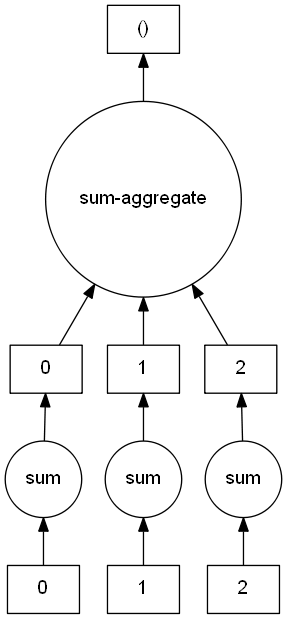

In [9]:
dask_array_from_np.sum().visualize()


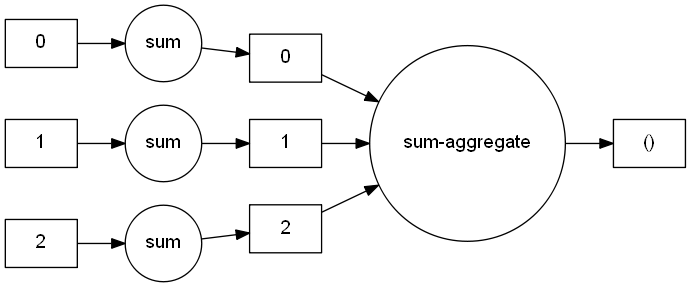

In [10]:
dask_array_from_np.sum().visualize(rankdir = "LR")


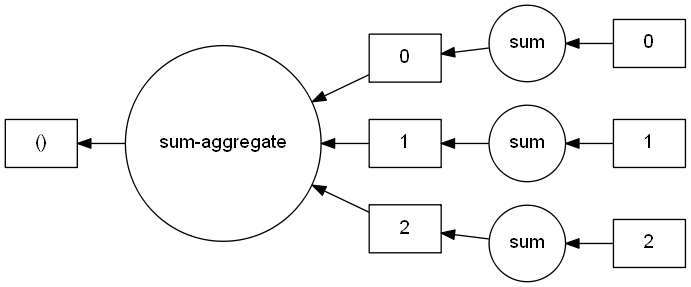

In [11]:
dask_array_from_np.sum().visualize(rankdir = "RL")


In [15]:
dask_arr_mean = da.mean(dask_array_from_np)
dask_arr_mean.compute()

12.166666666666666

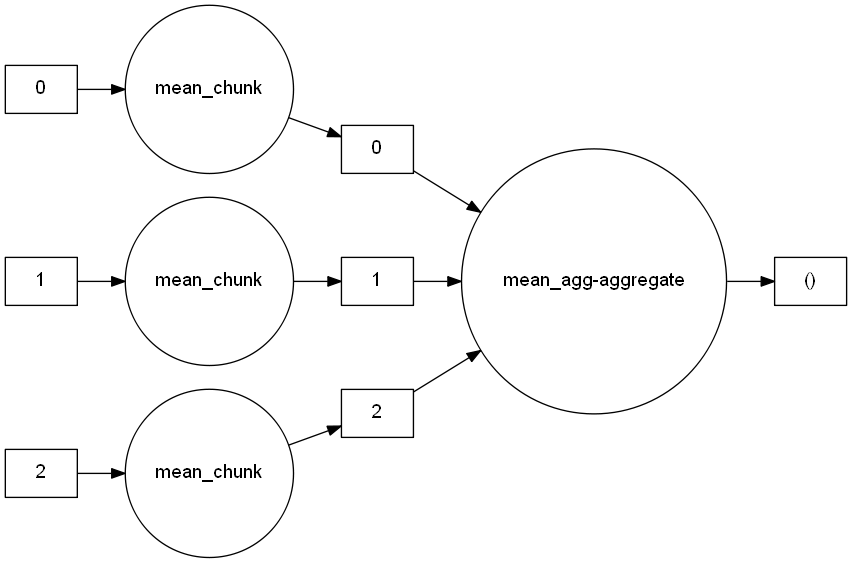

In [17]:
dask_arr_mean.visualize(rankdir = "LR")

### Another Example 

In [18]:
x = da.random.random(10 , chunks= 2)
y = da.random.random(10, chunks = 2)

In [19]:
sum_x_y = da.add(x, y) ## Simillar To The Numpy Arr
mean_x_y = da.mean(sum_x_y)

In [20]:
sum_x_y

dask.array<add, shape=(10,), dtype=float64, chunksize=(2,), chunktype=numpy.ndarray>

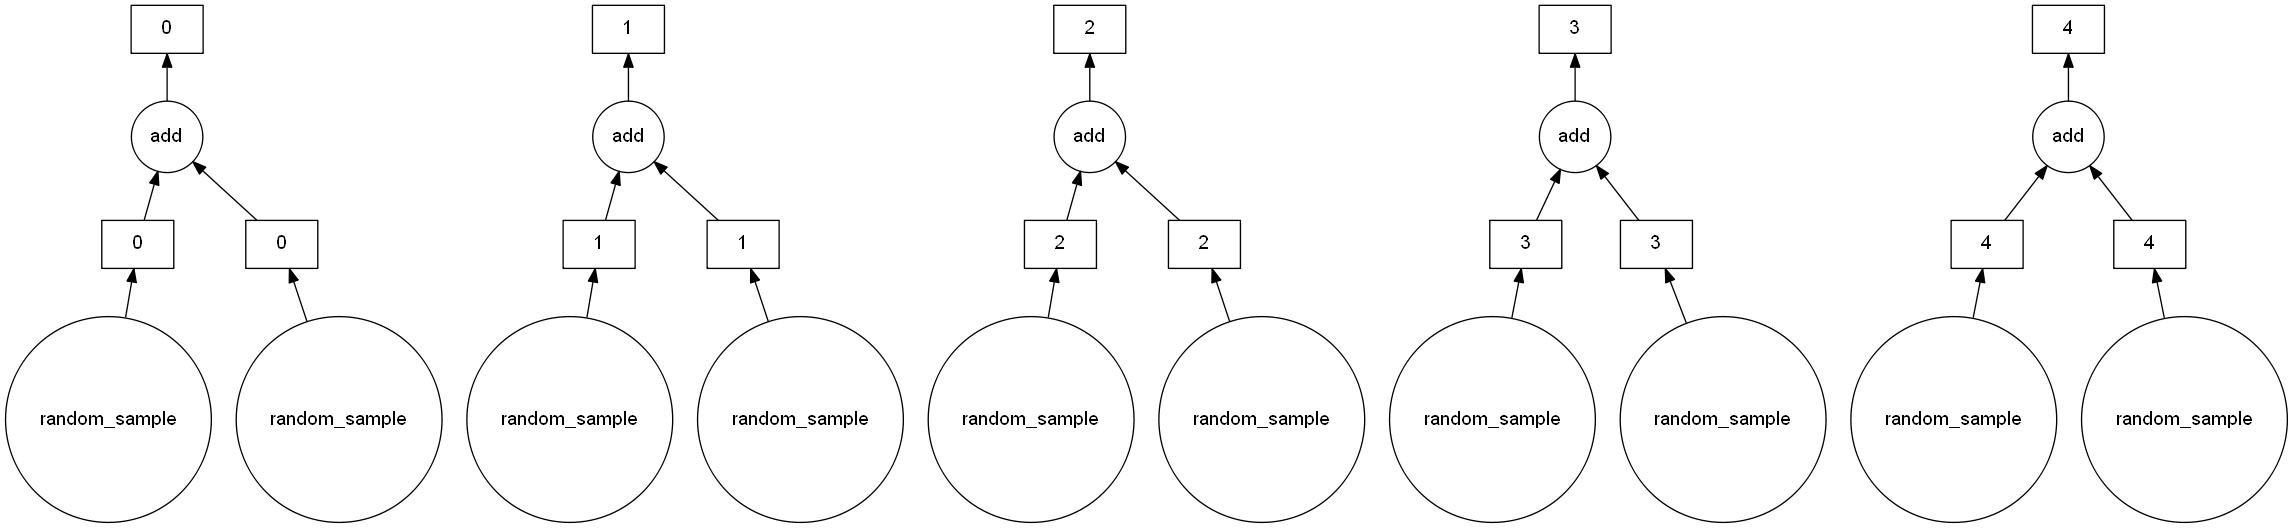

In [21]:
sum_x_y.visualize()

In [22]:
mean_x_y

dask.array<mean_agg-aggregate, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>

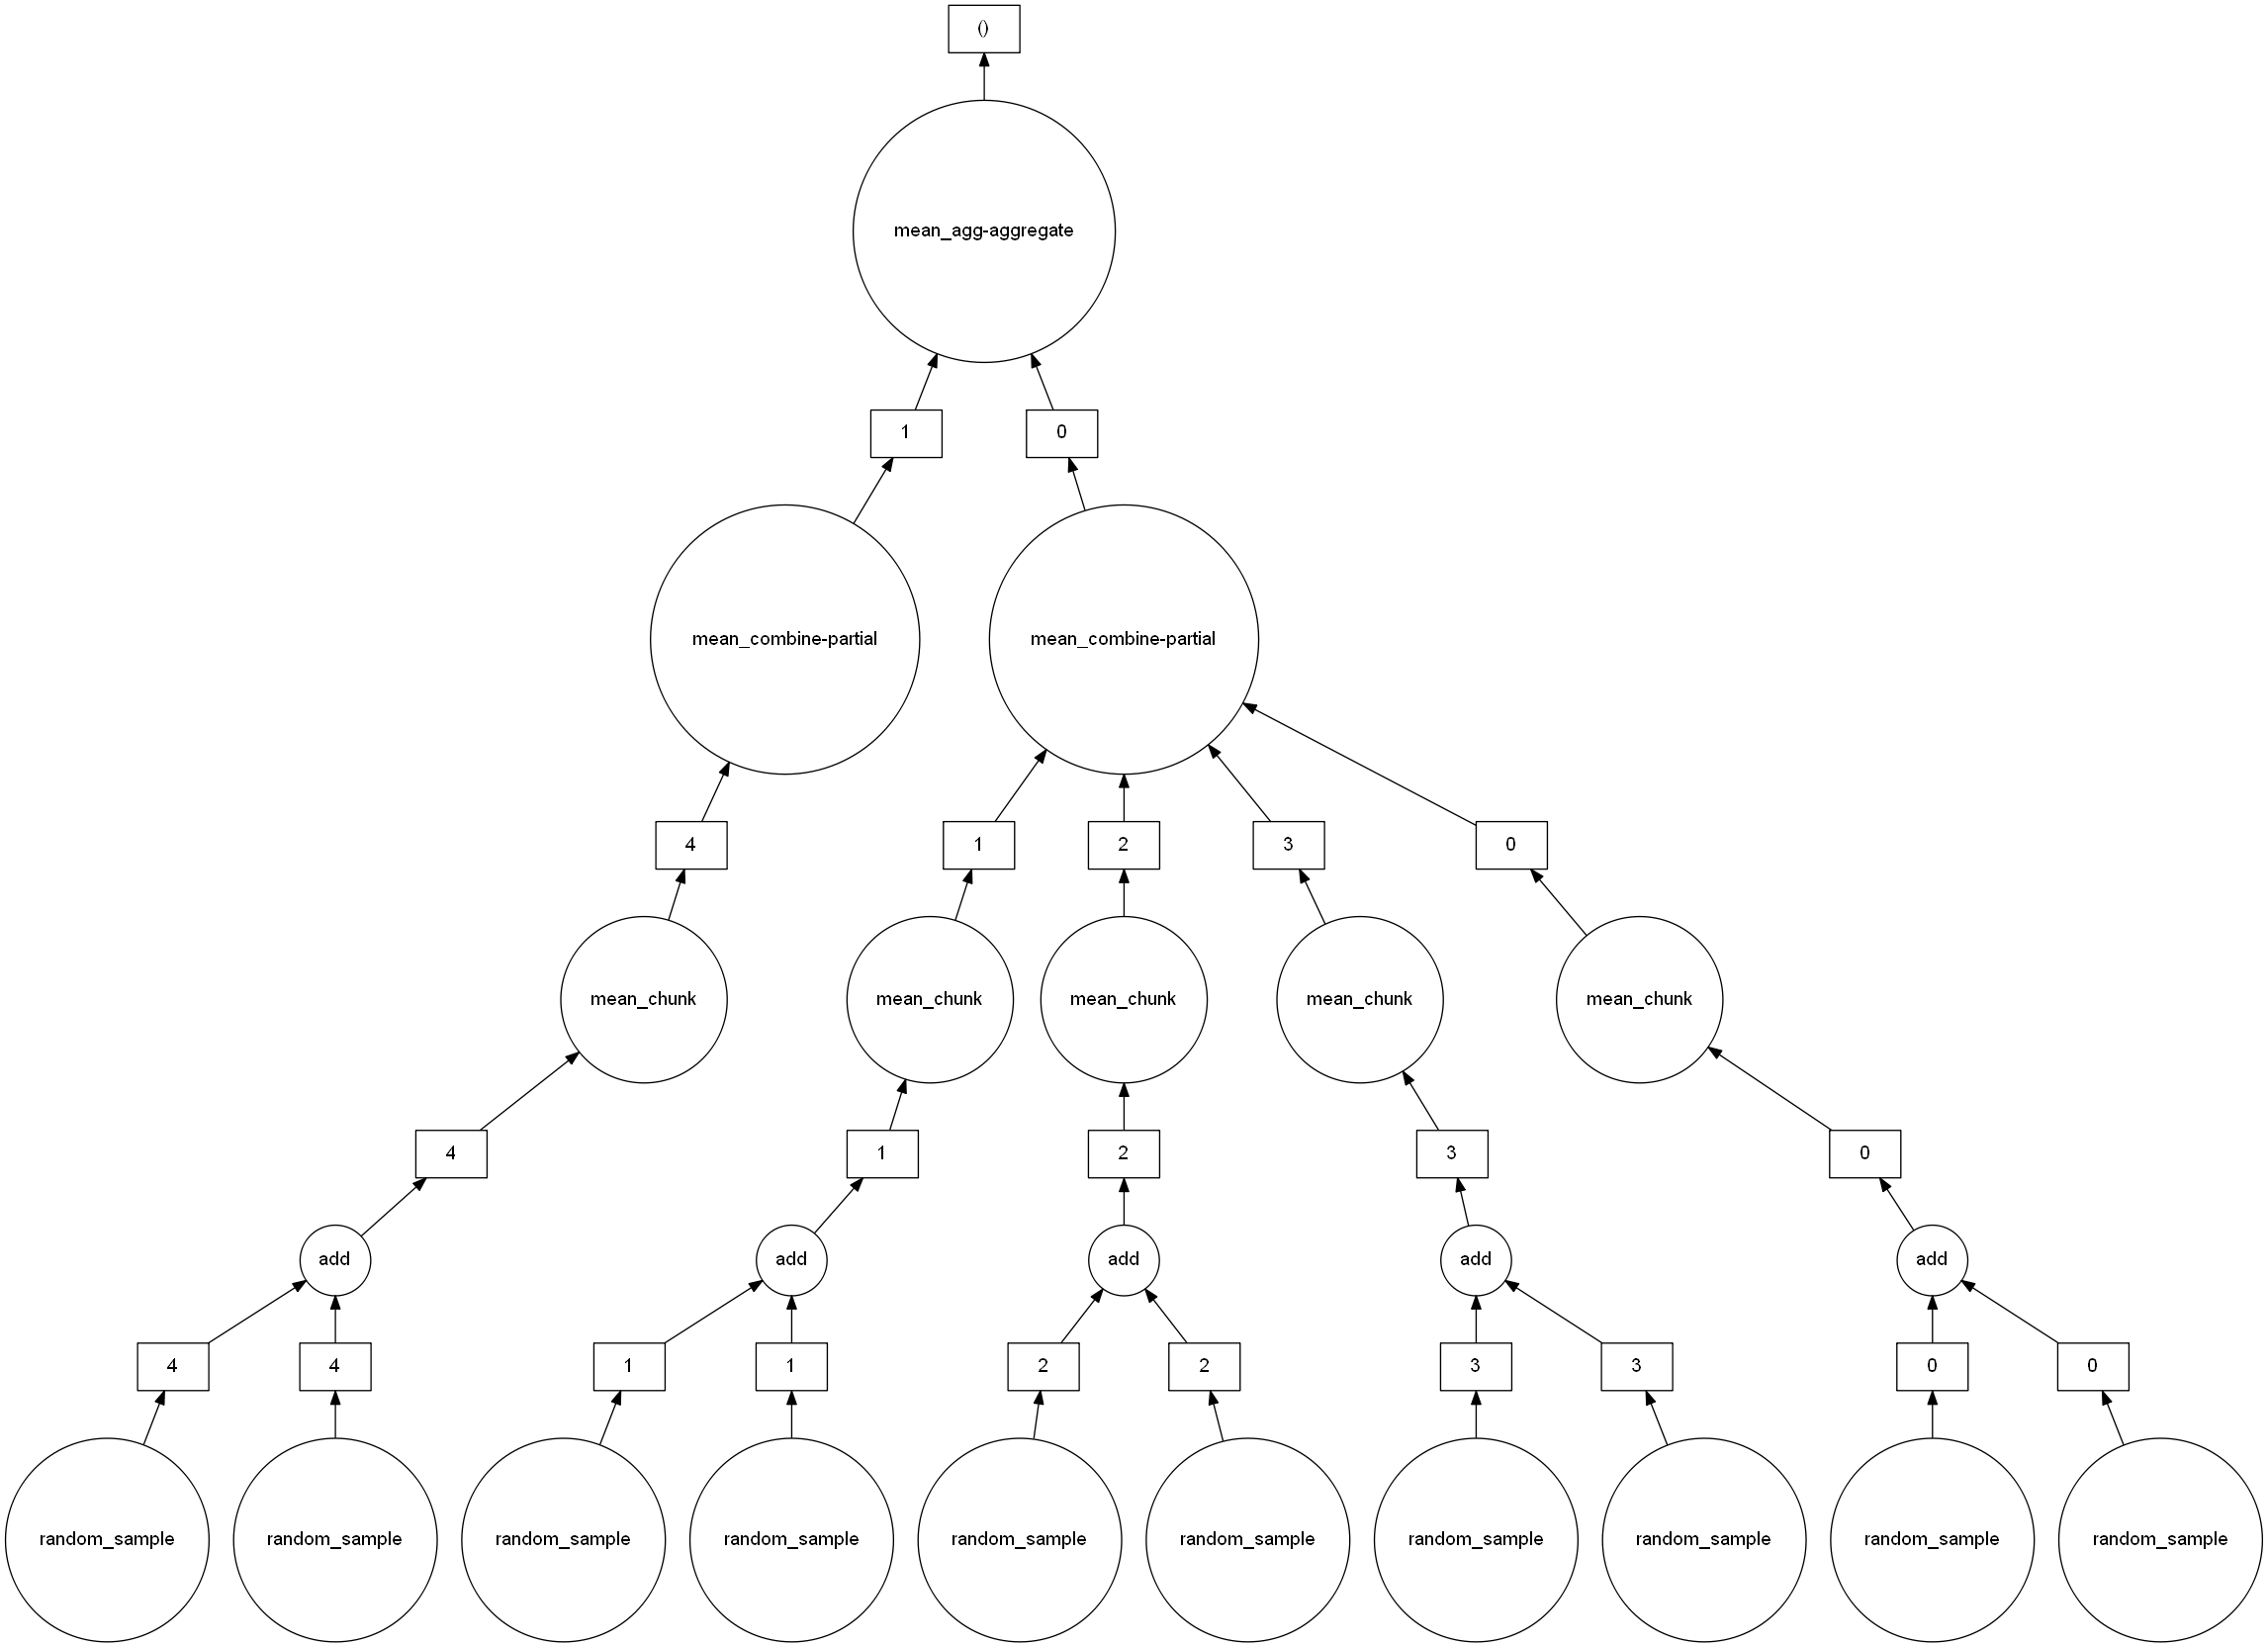

In [23]:
mean_x_y.visualize()

## An Example Out Of Memory Computation 

In [27]:
da_arr_large = da.random.randint(10000, size = (50000, 50000), chunks = (5000, 1000))

In [28]:
da_arr_large

dask.array<randint, shape=(50000, 50000), dtype=int32, chunksize=(5000, 1000), chunktype=numpy.ndarray>

In [29]:
da_arr_large.sum()

dask.array<sum-aggregate, shape=(), dtype=int32, chunksize=(), chunktype=numpy.ndarray>

In [32]:
da_arr_large.nbytes #no ot the bytes it taken to calculate the summation of the huge data as we can see the no of the zero

10000000000

### Convert Byte to gb  1 GB =1e+9 Bytes

In [34]:
da_arr_large.nbytes/1e+9

10.0

In [ ]:
da_arr_large.compute()